## Q2.2.1

## (i) & (ii)

In [ ]:
import pandas as pd
import numpy as np


data_path = "D:\\Desktop\\DDA_HW3\\abalone(1).data"  # file path
 
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'] # assign file path
df = pd.read_csv(data_path, header=None, names=column_names)

 
print(df.info()) # print information
 
display(df.head()) # display the data frame 

print('NaN in df:', df.isnull().sum()) # Check the number of NaN in data frame



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            4177 non-null   object 
 1   Length         4177 non-null   float64
 2   Diameter       4177 non-null   float64
 3   Height         4177 non-null   float64
 4   WholeWeight    4177 non-null   float64
 5   ShuckedWeight  4177 non-null   float64
 6   VisceraWeight  4177 non-null   float64
 7   ShellWeight    4177 non-null   float64
 8   Rings          4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


NaN in df: Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64


## (iii)

In [ ]:
# one-hot encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# check the encoding results
display(df.head())



,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,True,False


## (iv)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# initialize MinMaxScaler
scaler = MinMaxScaler()

#  select numerical columns
numerical_columns = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']

#  standardize these columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

#  check the standardization results
display(df.head())


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_I,Sex_M
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,15,False,True
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,7,False,True
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,9,False,False
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,10,False,True
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,7,True,False


## (v)

In [ ]:
# calculate 'Age' while deleting the 'Ring'
df['Age'] = df['Rings'] + 1.5
df = df.drop(columns=['Rings'])

# check the data after processing
display(df.head())


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Sex_I,Sex_M,Age
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982,False,True,16.5
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261,False,True,8.5
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773,False,False,10.5
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965,False,True,11.5
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313,True,False,8.5


## (vi)

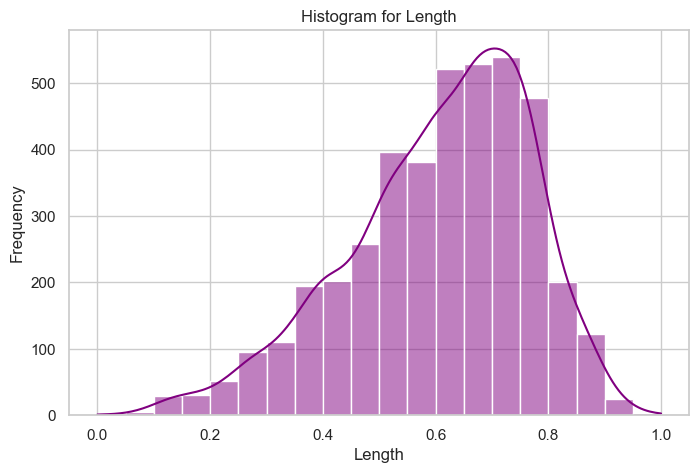

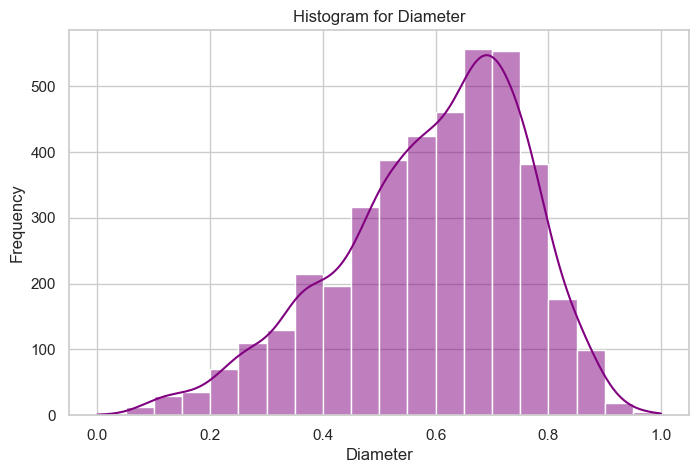

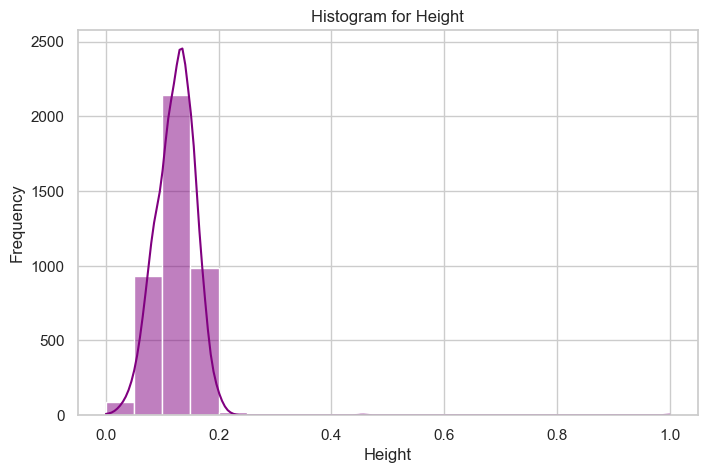

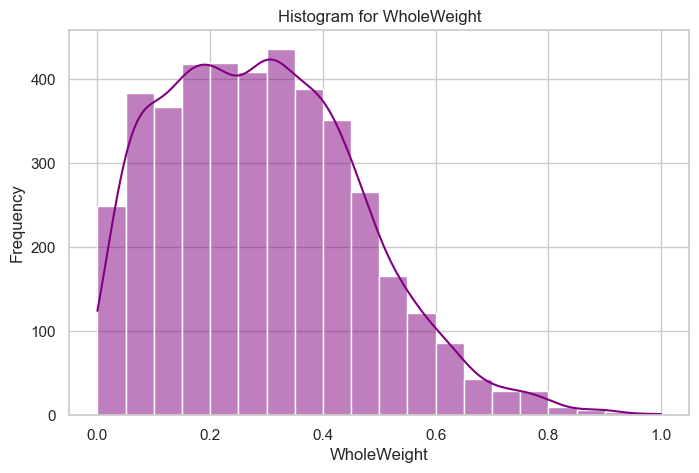

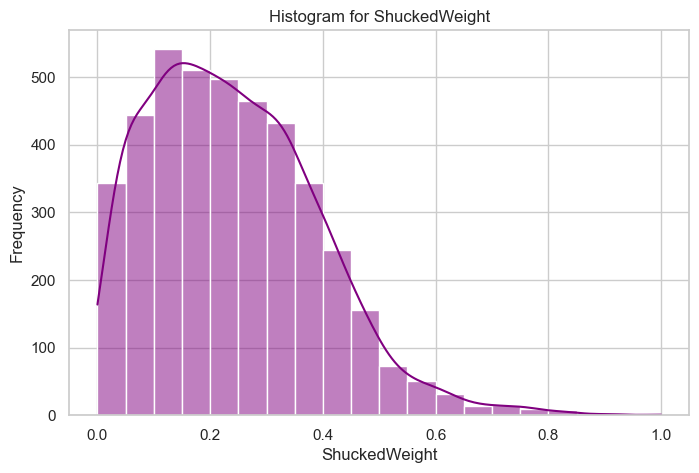

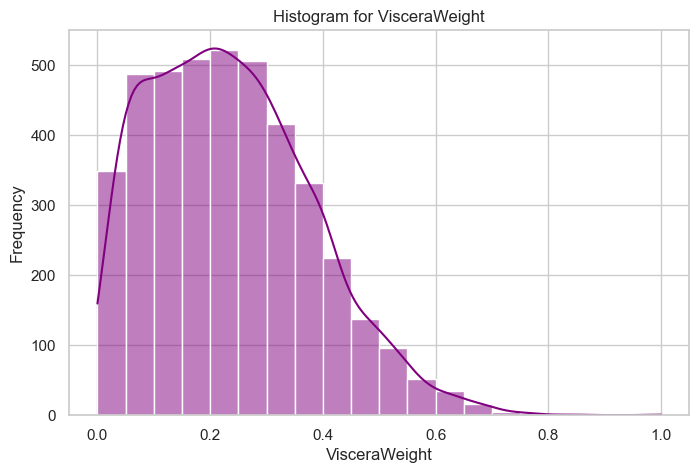

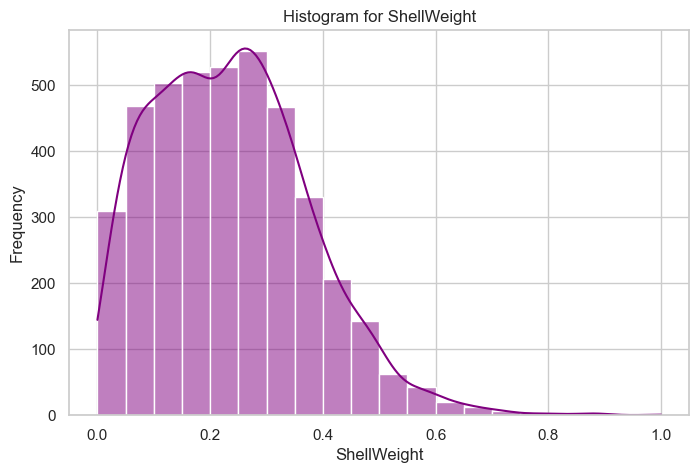

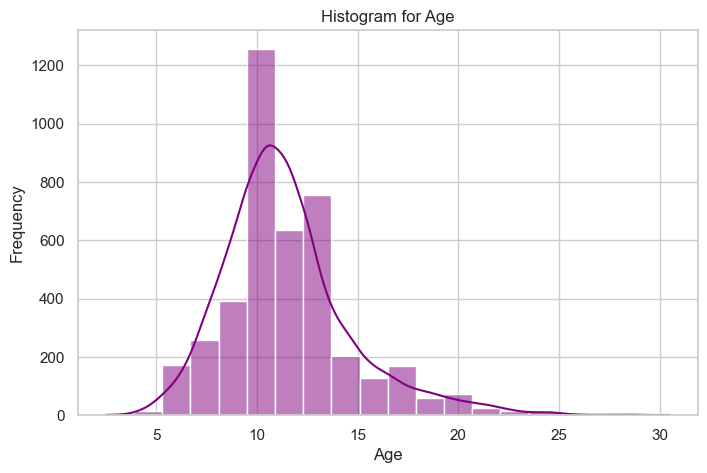

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables
numerical_columns = ['Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Age']

# Create a histogram for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, color='purple', bins=20)  # Adding kde (Kernel Density Estimation) for smoother curve
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


## Q2.2.2

## (i)

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering (excluding the target variable 'Age')
features = df.drop(columns=['Age'])

# Initialize the KMeans model with k=5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model to the features
kmeans.fit(features)

# Add the cluster labels to the dataframe
df['Cluster'] = kmeans.labels_

# Check the result
print(df.head())


     Length  Diameter    Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0  0.513514  0.521008  0.084071     0.181335       0.150303       0.132324   
1  0.371622  0.352941  0.079646     0.079157       0.066241       0.063199   
2  0.614865  0.613445  0.119469     0.239065       0.171822       0.185648   
3  0.493243  0.521008  0.110619     0.182044       0.144250       0.149440   
4  0.344595  0.336134  0.070796     0.071897       0.059516       0.051350   

   ShellWeight  Sex_I  Sex_M   Age  Cluster  
0     0.147982  False   True  16.5        3  
1     0.068261  False   True   8.5        3  
2     0.207773  False  False  10.5        2  
3     0.152965  False   True  11.5        3  
4     0.053313   True  False   8.5        0  


## (ii)

In [180]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score for the KMeans clustering
silhouette_avg = silhouette_score(features, kmeans.labels_)

# Print the silhouette coefficient
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5470483921709525


## Q2.2.3

## (i) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = df['WholeWeight'].values.reshape(-1, 1)   

#initiate parameters
np.random.seed(42)
n_components = 2  # 2 Gaussians
n_iterations = 20  # set the maximum iteration to be 20
n_samples = X.shape[0]

#  initialize means, covariance and weights
means = np.random.choice(X.flatten(), n_components)
covariances = np.array([np.var(X)] * n_components)
weights = np.ones(n_components) / n_components

# EM algorithm
for iteration in range(n_iterations):
    # E-step:  responsibilities
    responsibilities = np.zeros((n_samples, n_components))
    for k in range(n_components):
        responsibilities[:, k] = weights[k] * (
            1 / np.sqrt(2 * np.pi * covariances[k])
        ) * np.exp(-0.5 * ((X.flatten() - means[k]) ** 2) / covariances[k])
    responsibilities = responsibilities / responsibilities.sum(axis=1, keepdims=True)

    # M-step:  update means, covariances and weights
    for k in range(n_components):
        N_k = responsibilities[:, k].sum()
        means[k] = (responsibilities[:, k] @ X.flatten()) / N_k
        covariances[k] = (
            (responsibilities[:, k] @ (X.flatten() - means[k]) ** 2) / N_k
        )
        weights[k] = N_k / n_samples

    # print out each iteration
    print(f"Iteration {iteration + 1}:")
    print(f"Means: {means}")
    print(f"Covariances: {covariances}")
    print(f"Weights: {weights}")
    print("-" * 50)

# output final results
print("Final Parameters:")
print(f"Means: {means}")
print(f"Covariances: {covariances}")
print(f"Weights: {weights}")


Iteration 1:
Means: [0.30886903 0.27822445]
Covariances: [0.03138019 0.02860133]
Weights: [0.47587908 0.52412092]
--------------------------------------------------
Iteration 2:
Means: [0.31095342 0.27633802]
Covariances: [0.03267371 0.0273045 ]
Weights: [0.47578656 0.52421344]
--------------------------------------------------
Iteration 3:
Means: [0.31473137 0.27293345]
Covariances: [0.03385504 0.02597582]
Weights: [0.47548095 0.52451905]
--------------------------------------------------
Iteration 4:
Means: [0.31984171 0.26836889]
Covariances: [0.03488577 0.02462612]
Weights: [0.47478793 0.52521207]
--------------------------------------------------
Iteration 5:
Means: [0.32587889 0.26305532]
Covariances: [0.03568781 0.02331395]
Weights: [0.47358409 0.52641591]
--------------------------------------------------
Iteration 6:
Means: [0.33243353 0.25740269]
Covariances: [0.03620023 0.02210287]
Weights: [0.47187098 0.52812902]
--------------------------------------------------
Iteration 

## (ii)

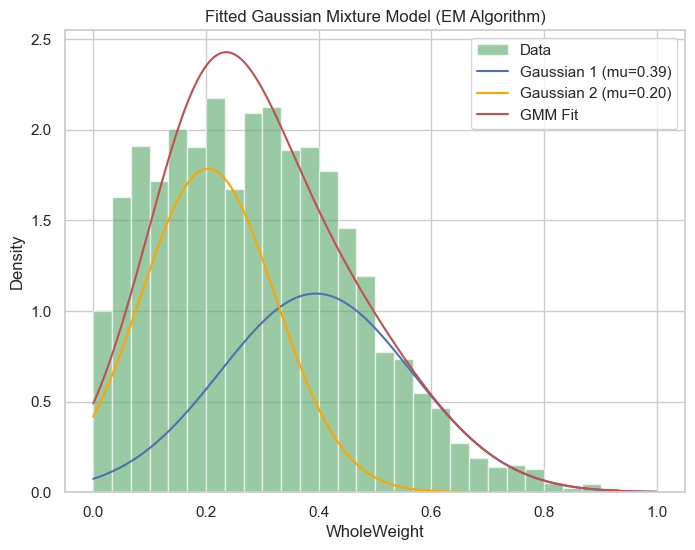

In [ ]:
# Plotting GMM
x_vals = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
gmm_pdf = np.zeros_like(x_vals)

#  calculate pdf of each Gaussian
g1_pdf = weights[0] * (1 / np.sqrt(2 * np.pi * covariances[0])) * np.exp(
    -0.5 * ((x_vals - means[0]) ** 2) / covariances[0]
)
g2_pdf = weights[1] * (1 / np.sqrt(2 * np.pi * covariances[1])) * np.exp(
    -0.5 * ((x_vals - means[1]) ** 2) / covariances[1]
)

# Total GMM pdf
gmm_pdf = g1_pdf + g2_pdf

# plotting
plt.figure(figsize=(8, 6))
plt.hist(X, bins=30, density=True, alpha=0.6, color="g", label="Data")
plt.plot(x_vals, g1_pdf, color="b", label=f"Gaussian 1 (mu={means[0]:.2f})")
plt.plot(x_vals, g2_pdf, color="orange", label=f"Gaussian 2 (mu={means[1]:.2f})")
plt.plot(x_vals, gmm_pdf, color="r", label="GMM Fit")
plt.title("Fitted Gaussian Mixture Model (EM Algorithm)")
plt.xlabel("WholeWeight")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## (iii)

Means: [0.16858865 0.41243362]
Covariances: [0.00940781 0.02097264]
Weights: [0.49058242 0.50941758]


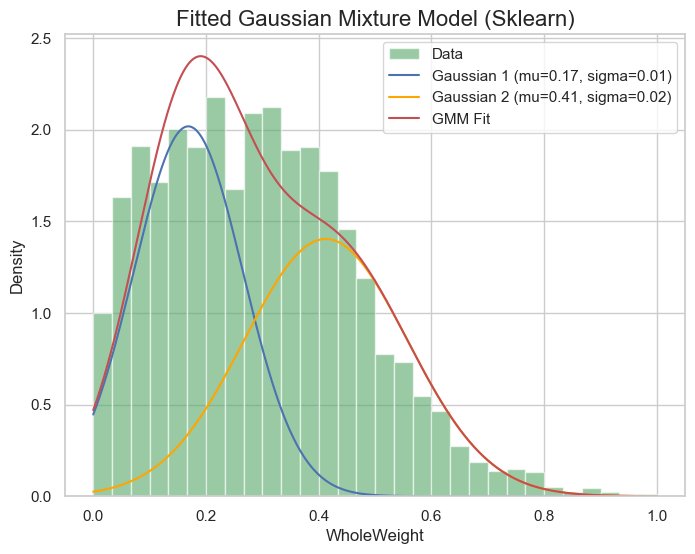

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

# apply sklearn to conduct GMM
gmm = GaussianMixture(n_components=2, max_iter=20, random_state=42)
gmm.fit(X)

#Obtain parameters
means_sklearn = gmm.means_.flatten()
covariances_sklearn = gmm.covariances_.flatten()
weights_sklearn = gmm.weights_

# print parameters
print("Means:", means_sklearn)
print("Covariances:", covariances_sklearn)
print("Weights:", weights_sklearn)

# create x-axis  
x_vals = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)

#  calculate pdf of each Gaussian
g1_pdf_sklearn = weights_sklearn[0] * (
    1 / np.sqrt(2 * np.pi * covariances_sklearn[0])
) * np.exp(-0.5 * ((x_vals - means_sklearn[0]) ** 2) / covariances_sklearn[0])

g2_pdf_sklearn = weights_sklearn[1] * (
    1 / np.sqrt(2 * np.pi * covariances_sklearn[1])
) * np.exp(-0.5 * ((x_vals - means_sklearn[1]) ** 2) / covariances_sklearn[1])

# calculate overall GMM
gmm_pdf_sklearn = g1_pdf_sklearn + g2_pdf_sklearn

#  Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(X, bins=30, density=True, alpha=0.6, color="g", label="Data")

# first Gaussian
plt.plot(
    x_vals,
    g1_pdf_sklearn,
    color="b",
    label=f"Gaussian 1 (mu={means_sklearn[0]:.2f}, sigma={covariances_sklearn[0]:.2f})",
)

# second Gaussian
plt.plot(
    x_vals,
    g2_pdf_sklearn,
    color="orange",
    label=f"Gaussian 2 (mu={means_sklearn[1]:.2f}, sigma={covariances_sklearn[1]:.2f})",
)

# overall GMM  
plt.plot(x_vals, gmm_pdf_sklearn, color="r", label="GMM Fit")

# title and labels
plt.title("Fitted Gaussian Mixture Model (Sklearn)", fontsize=16)
plt.xlabel("WholeWeight")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## (iv)

In [ ]:
# exclude the target variable column
X_all = df.drop(columns=['Age']).values

# use sklearn to conduct GMM
gmm_all = GaussianMixture(n_components=2, max_iter=20, random_state=42)
gmm_all.fit(X_all)

# print parameters
print("Means (all predictors):", gmm_all.means_)
print("Covariances (all predictors):", gmm_all.covariances_)
print("Weights (all predictors):", gmm_all.weights_)

Means (all predictors): [[5.83608725e-01 5.67462832e-01 1.17414956e-01 2.73255332e-01
  2.29541278e-01 2.18952744e-01 2.18446041e-01 6.07337025e-01
  3.92662975e-01 3.92662975e-01]
 [6.32691875e-01 6.21801812e-01 1.30251188e-01 3.14733071e-01
  2.53850292e-01 2.57495121e-01 2.56751943e-01 5.07871952e-04
  3.35703486e-01 3.02742483e+00]]
Covariances (all predictors): [[[ 3.24818941e-02  3.29635106e-02  6.20002459e-03  3.09637001e-02
    2.60731549e-02  2.49638087e-02  2.38822372e-02 -6.51214832e-02
    6.51214832e-02  6.51214832e-02]
  [ 3.29635106e-02  3.41592361e-02  6.39300944e-03  3.18416812e-02
    2.67197600e-02  2.56163876e-02  2.46959499e-02 -6.76879845e-02
    6.76879845e-02  6.76879845e-02]
  [ 6.20002459e-03  6.39300944e-03  1.37997625e-03  6.28398928e-03
    5.19814558e-03  5.07285112e-03  4.93500581e-03 -1.33113731e-02
    1.33113731e-02  1.33113731e-02]
  [ 3.09637001e-02  3.18416812e-02  6.28398928e-03  3.45960725e-02
    2.91411731e-02  2.77130649e-02  2.61962892e-02 -7.

## (v)

In [ ]:
from sklearn.metrics import silhouette_score

# obtaining labels
labels_gmm = gmm_all.predict(X_all)

# calculate GMM Silhouette Coefficient
silhouette_gmm = silhouette_score(X_all, labels_gmm)

# output GMM Silhouette Coefficient
print(f"Silhouette Coefficient (GMM): {silhouette_gmm}")
# Print the silhouette coefficient
print(f'Silhouette Score: {silhouette_avg}')




Silhouette Coefficient (GMM): 0.5818706298860941
Silhouette Score: 0.5470483921709525


## Preference: ##
Since GMM achieves a higher silhouette score compared to KMeans, it suggests that GMM provides better clustering results for this dataset. This preference for GMM indicates that the probabilistic nature of GMM is a better fit for the data's underlying structure, especially if the clusters are not perfectly spherical or equally sized.Thus, based on the silhouette scores, GMM is the preferred model for clustering in this case, as it results in more meaningful, well-separated clusters.